# ETF Trend-Following Strategy Backtest Analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from backtester import Backtester

## Load Data

In [5]:
# Load price data and convert dates
daily_prices = pd.read_csv('data/daily_prices.csv', parse_dates=['Date'])
weekly_prices = pd.read_csv('data/weekly_prices.csv', parse_dates=['Date'])

print(f"Data from {daily_prices['Date'].iloc[0]} to {daily_prices['Date'].iloc[-1]}")
daily_prices.head()

Data from 2015-05-07 00:00:00 to 2025-05-02 00:00:00


,Date,DBC,GLD,HYG,IEF,QQQ,SPY,TBF,TLT
0,2015-05-07,15.834917,113.419998,53.349209,86.461021,99.426552,175.737656,22.333658,94.427467
1,2015-05-08,15.922306,113.970001,53.768368,86.794418,100.667633,178.051453,22.246046,94.682503
2,2015-05-11,15.852394,113.529999,53.431870,85.940498,100.278618,177.201660,22.806801,92.379364
3,2015-05-12,16.018433,114.500000,53.425987,86.005577,99.824799,176.671585,22.736704,92.618973
4,2015-05-13,16.035913,116.550003,53.349209,85.891663,100.028580,176.705292,22.920698,91.877022


## Run Backtest

In [6]:
# Initialize and run backtest
bt = Backtester(daily_prices, weekly_prices)
bt.run_backtest(initial_capital=10000, rebalance_freq='W-FRI')

# Get performance metrics
metrics = bt.get_performance_metrics()
metrics

/Users/zettt/Coding/Finance/Systematic Low-Correlation ETF Trend Strategy/backtester.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  peak = equity_curve[0]


{'strategy': {'CAGR': np.float64(0.07912936754207389),
  'Max Drawdown': 0.16639342524863904,
  'Sharpe Ratio': np.float64(0.7883416316239478),
  'Peak Date': Timestamp('2025-04-21 00:00:00'),
  'Trough Date': Timestamp('2023-03-10 00:00:00')},
 'benchmark': {'CAGR': np.float64(0.12438791063041243),
  'Max Drawdown': 0.3371724611297642,
  'Sharpe Ratio': np.float64(0.7344998745658162)}}

## Performance Visualization

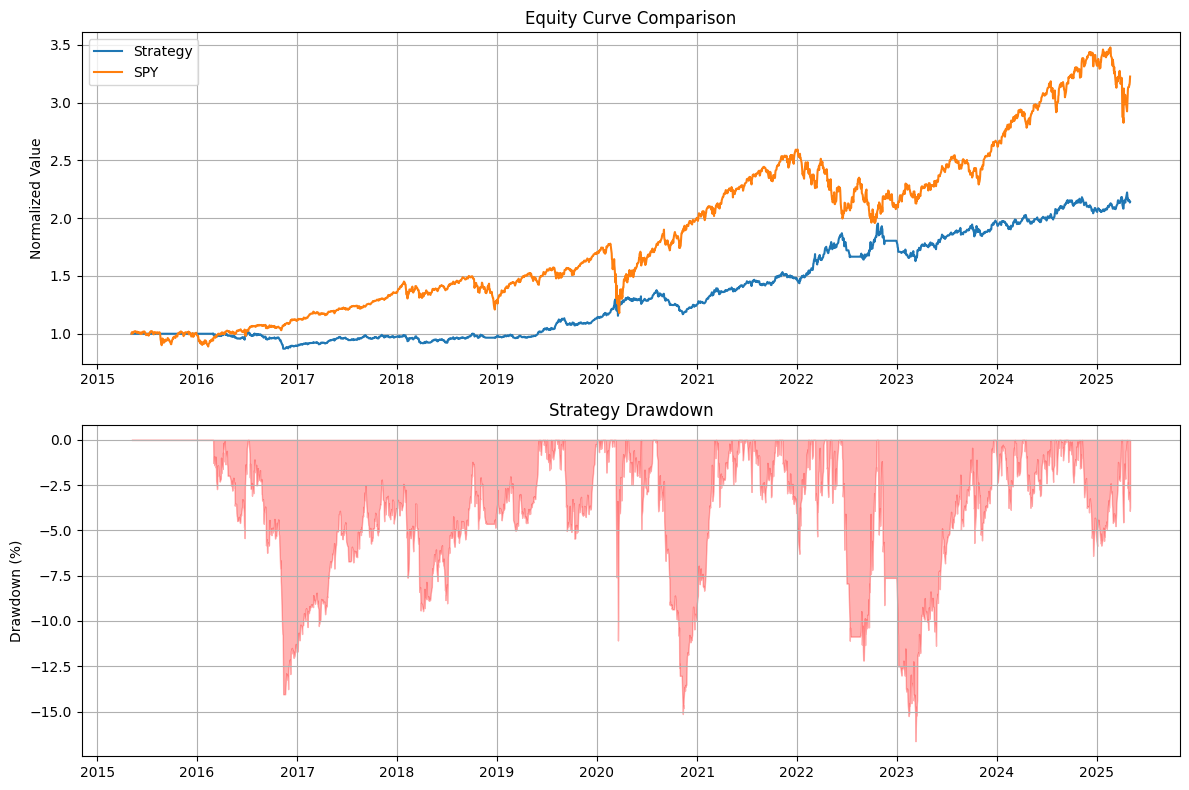

In [7]:
# Show equity curve and drawdown
fig = bt.plot_results()
plt.show()

## Trade Analysis

In [14]:
# Show trade history
print(bt.trades.head(10))
print(f'{len(bt.trades)} trades')

        date  etf     shares       price  type
0 2016-02-26  IEF  54.926478   91.030777   buy
1 2016-02-26  TLT  48.672379  102.727669   buy
2 2016-03-04  IEF -18.344157   90.111488  sell
3 2016-03-04  GLD  27.347664  120.540001   buy
4 2016-03-04  TLT -16.192758  101.494026  sell
5 2016-03-11  IEF -36.582322   89.516914  sell
6 2016-03-11  GLD  13.708460  119.410004   buy
7 2016-03-11  TLT  16.294110  100.515419   buy
8 2016-03-18  IEF  36.497696   90.293137   buy
9 2016-03-18  GLD -13.547849  119.800003  sell
1329 trades


## Performance Summary

In [9]:
def print_metrics(metrics):
    print("Strategy Performance:")
    print(f"  CAGR: {metrics['strategy']['CAGR']:.1%}")
    print(f"  Max Drawdown: {metrics['strategy']['Max Drawdown']:.1%}")
    print(f"  Sharpe Ratio: {metrics['strategy']['Sharpe Ratio']:.2f}")
    print(f"  Peak: {metrics['strategy']['Peak Date']}")
    print(f"  Trough: {metrics['strategy']['Trough Date']}")
    
    print("\nSPY Benchmark:")
    print(f"  CAGR: {metrics['benchmark']['CAGR']:.1%}")
    print(f"  Max Drawdown: {metrics['benchmark']['Max Drawdown']:.1%}")
    print(f"  Sharpe Ratio: {metrics['benchmark']['Sharpe Ratio']:.2f}")

print_metrics(metrics)

Strategy Performance:
  CAGR: 7.9%
  Max Drawdown: 16.6%
  Sharpe Ratio: 0.79
  Peak: 2025-04-21 00:00:00
  Trough: 2023-03-10 00:00:00

SPY Benchmark:
  CAGR: 12.4%
  Max Drawdown: 33.7%
  Sharpe Ratio: 0.73
